In [1]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #Adjust the configurations of the plot

#Reading data
df=pd.read_csv(r'C:\Users\darya\Heart Disease Data.csv')

C:\Users\darya\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Looking into data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
#Checking for missing values
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

age-0.0%
sex-0.0%
cp-0.0%
trestbps-0.0%
chol-0.0%
fbs-0.0%
restecg-0.0%
thalach-0.0%
exang-0.0%
oldpeak-0.0%
slope-0.0%
ca-0.0%
thal-0.0%
target-0.0%


In [7]:
#Data types for columns
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
pd.set_option('display.max_rows',None)  #to display the whole rows 

In [7]:
#checking duplicates 
duplicates=df.duplicated()
print(duplicates)





0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool


In [8]:
df['age'].sort_values(ascending=False)

387    77
162    77
160    77
965    76
99     76
       ..
779    34
668    29
118    29
60     29
64     29
Name: age, Length: 1025, dtype: int64

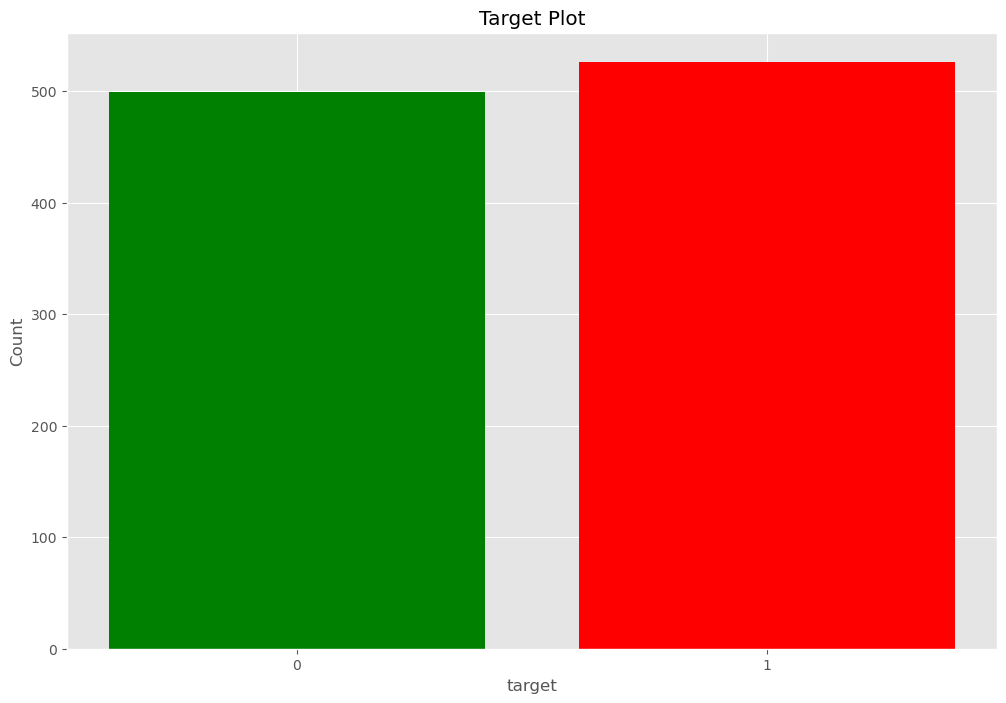

In [9]:
# Count the occurrences of each boolean value
true_count = df['target'].sum()
false_count = len(df) - true_count

# Create a bar plot
plt.bar(['0', '1'], [false_count, true_count], color=['green','red'])

# Add labels and title if needed
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Target Plot')

# Show the plot
plt.show()

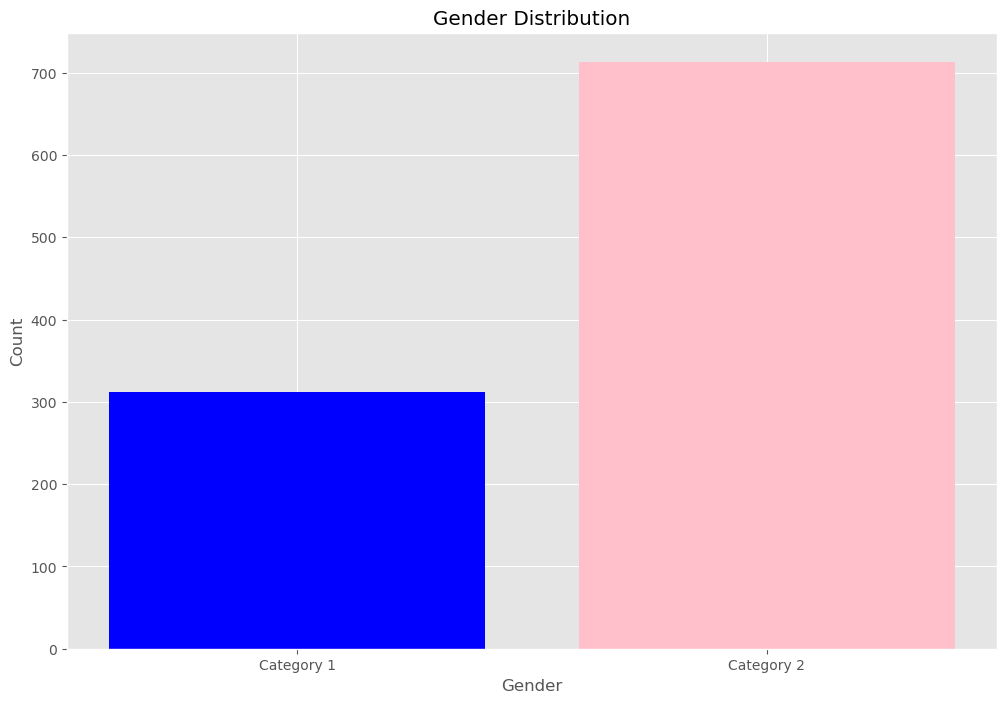

In [10]:
# Count the occurrences of each boolean value
true_count = df['sex'].sum()
false_count = len(df) - true_count

# Create a bar plot
plt.bar(['Category 1', 'Category 2'], [false_count, true_count], color=['blue','pink'])

# Add labels and title if needed
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

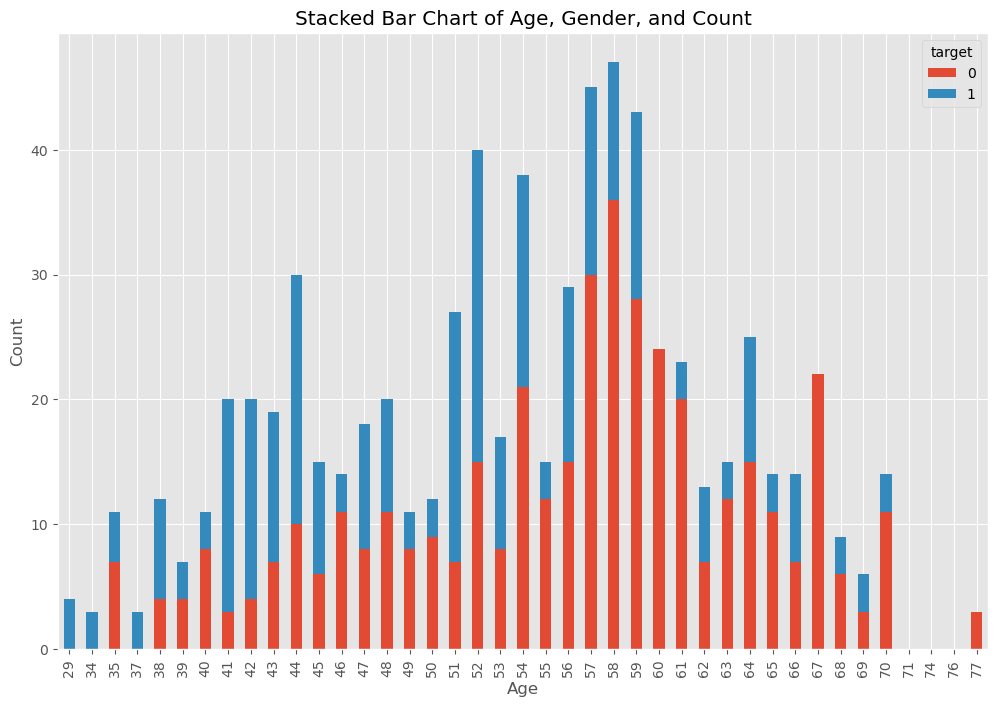

In [11]:
# Pivot the data to get sums for each gender per age
pivot_df = df.pivot_table(index='age', columns='target', values='sex', aggfunc='sum')

# Plot stacked bars
pivot_df.plot(kind='bar', stacked=True)

# Add labels and title if needed
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Age, Gender, and Count')

# Show the plot
plt.show()

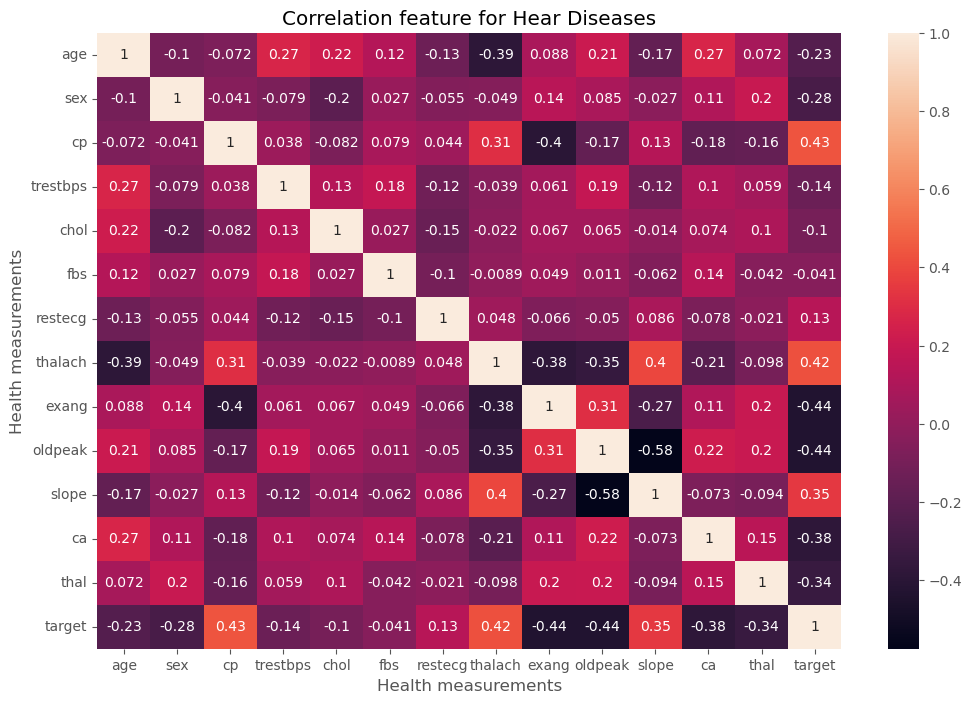

In [13]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation feature for Hear Diseases')
plt.xlabel('Health measurements')
plt.ylabel('Health measurements')
plt.show()

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [15]:
correlation_mat=df.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

age     age         1.000000
        sex        -0.103240
        cp         -0.071966
        trestbps    0.271121
        chol        0.219823
                      ...   
target  oldpeak    -0.438441
        slope       0.345512
        ca         -0.382085
        thal       -0.337838
        target      1.000000
Length: 196, dtype: float64

In [18]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

slope     oldpeak    -0.575189
oldpeak   slope      -0.575189
target    oldpeak    -0.438441
oldpeak   target     -0.438441
exang     target     -0.438029
                        ...   
trestbps  trestbps    1.000000
cp        cp          1.000000
sex       sex         1.000000
thal      thal        1.000000
target    target      1.000000
Length: 196, dtype: float64

In [19]:
high_corr=sorted_pairs[(sorted_pairs>0.5)]
high_corr

age       age         1.0
ca        ca          1.0
slope     slope       1.0
oldpeak   oldpeak     1.0
exang     exang       1.0
thalach   thalach     1.0
restecg   restecg     1.0
fbs       fbs         1.0
chol      chol        1.0
trestbps  trestbps    1.0
cp        cp          1.0
sex       sex         1.0
thal      thal        1.0
target    target      1.0
dtype: float64